In [28]:
%load_ext autoreload
%aimport utils
%autoreload 1

import uproot as ut
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import utils

from utils.cutConfig import *

zip_values = lambda values_list : { key:np.array([ values[key] for values in values_list ]) for key in values_list[0].keys() }

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
filename = "../signal/NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_May2021.root:sixBtree"
ttree = ut.open(filename)
branches = utils.Branches(ttree)

In [32]:
ptlist = np.arange(0,101,10)

selection_ptlist = [ utils.iterative_selection(branches,[{"variable":"jet_ptRegressed","ptcut":ptcut,"njets":3,"njetcut":3}]) for ptcut in ptlist ]
values_ptlist = [ utils.calculate_selection(branches,selection[0]) for selection in selection_ptlist ]
pt_valuemap = zip_values(values_ptlist)

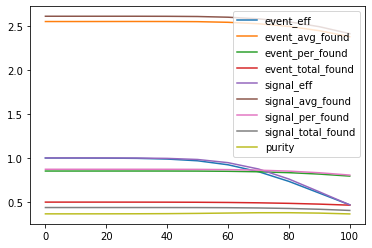

In [33]:
for key,values in pt_valuemap.items():
    plt.plot(ptlist,values,label=key)
plt.legend()
plt.show()

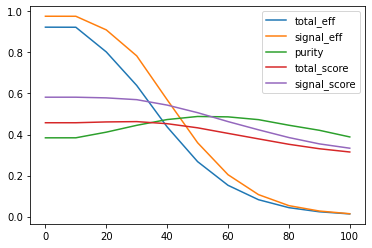

In [17]:
plot_scores(pt_valmap,ptlist)

In [21]:
btaglist = np.linspace(0,1,11)[:-1]
btag_valmap = {
    "total_eff":[],
    "signal_eff":[],
    "purity":[],
    "total_score":[],
    "signal_score":[]
}

for btagcut in btaglist:
    event_presel_mask, jet_presel_mask = std_preselection(branches,btagcut=btagcut,ptcut=10.)
    (preselected,sixb_count_presel),(signal_preselected,signal_sixb_count_presel) = get_selected(branches,"jet_btag",mask=event_presel_mask,
                                                                                                         jets=jet_presel_mask,sixb_jets=sixb_jets,
                                                                                                         sixb_found_mask=sixb_found_mask)
    scores = calc_scores(branches,event_presel_mask,
                         preselected,signal_preselected,
                         sixb_count_presel,signal_sixb_count_presel,
                         sixb_jets,sixb_found_mask)
    for tag,val in scores.items(): btag_valmap[tag].append(val)

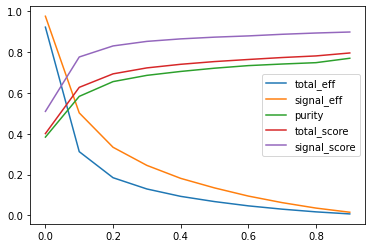

In [22]:
plot_scores(btag_valmap,btaglist)